In [1]:
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [39]:
df = pd.read_csv('preprocessed_data.csv')
dff = df.copy()

In [40]:
df.shape

(3706, 15)

In [41]:
df.columns

Index(['id', 'page_number', 'is_premium', 'title', 'topic_tags', 'difficulty',
       'similar_questions', 'no_similar_questions', 'acceptance', 'accepted',
       'submission', 'discussion_count', 'likes', 'dislikes', 'problem_URL'],
      dtype='object')

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.isnull().sum()[(df.isnull().sum() != 0)].sort_values()

page_number    706
dtype: int64

In [44]:
df.sample(5)

,id,page_number,is_premium,title,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,submission,discussion_count,likes,dislikes,problem_URL
2825,2826,57.0,False,2826. Sorting Three Groups,"['Array', 'Binary Search', 'Dynamic Programming']",Medium,['[]'],1.0,42.392669,24656,58161,29,518,91,https://leetcode.com/problems/sorting-three-gr...
2973,2974,60.0,False,2974. Minimum Number Game,"['Array', 'Sorting', 'Heap (Priority Queue)', ...",Easy,['[]'],1.0,85.152000,129437,152007,24,299,22,https://leetcode.com/problems/minimum-number-g...
2843,2844,57.0,False,2844. Minimum Operations to Make a Special Number,"['Math', 'String', 'Greedy', 'Enumeration']",Medium,"[""['Remove K Digits'"", ""'Remove Digit From Num...",2.0,38.271029,28696,74981,18,369,56,https://leetcode.com/problems/minimum-operatio...
3434,3435,NaN,False,3435. Frequencies of Shortest Supersequences,"['Array', 'String', 'Bit Manipulation', 'Graph...",Hard,['[]'],1.0,17.265943,2036,11792,11,25,8,https://leetcode.com/problems/frequencies-of-s...
2161,2162,44.0,False,2162. Minimum Cost to Set Cooking Time,"['Math', 'Enumeration']",Medium,"[""['Minimum Time Difference']""]",1.0,41.163535,18906,45929,17,235,642,https://leetcode.com/problems/minimum-cost-to-...


In [45]:
fig = go.Figure(
    data = [
        go.Pie(
            labels=['Non-Premium', 'Premium'],
            values=df['is_premium'].value_counts().values.tolist(),
            insidetextfont=dict(color='black', size=18, family='Arial'),
        )
    ]
)

fig.update_layout(
    title_text='LeetCode Problem Premium Status',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.47
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
    textfont_size=15,
    pull=[0.1, 0],
    marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2))
)

fig.show()

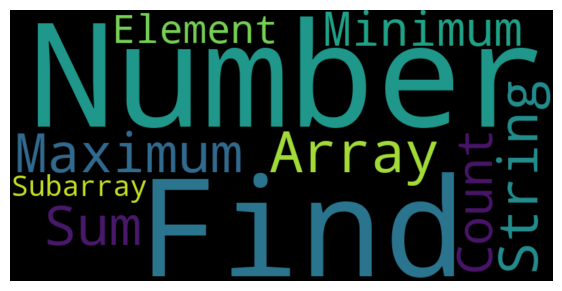

In [19]:
# Generate a word cloud
wordcloud = WordCloud(
    width=800, height=400, max_words=10,
    min_word_length=3,
    background_color='black'
).generate(' '.join(df['title']))

# Display the word cloud
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Pie(
            labels=df['difficulty'].value_counts().index.tolist(),
            values=df['difficulty'].value_counts().values.tolist(),
            insidetextfont=dict(color='black', size=18, family='Arial'),
        )
    ]
)

fig.update_layout(
    title_text='LeetCode Difficulty Level',
    title_font=dict(size=20, family='Arial', color='green'),
    title_x=0.48,
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
    textfont_size=15,
    marker=dict(colors=['#FFD700', '#00CED1', '#FF8C00'], line=dict(color='#000000', width=2))
)

fig.show()

In [21]:

df['acceptance'].describe()

count    3706.000000
mean       56.632944
std        17.075102
min        10.453008
25%        44.438773
50%        56.952432
75%        68.831684
max        96.682464
Name: acceptance, dtype: float64

In [22]:

df['acceptance'].skew()

np.float64(-0.13391784925149583)

In [23]:

df['acceptance'].kurt()

np.float64(-0.5460225951185218)

In [24]:
fig = px.histogram(
    df,
    x='acceptance',
    marginal='box',
    nbins=10,
    color_discrete_sequence=['#FF8C00']
)

fig.update_layout(
    title_text='Distribution of Acceptance Rates',
    title_font=dict(size=20, family='Arial', color='white'),
    title_x=0.33,
    xaxis_title='Acceptance Rate',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 110, 10)))
)

fig.show()

In [26]:

tag_counts = df['topic_tags'].str.split(', ').explode().value_counts(ascending=True)[-10:]
tag_counts = tag_counts.reset_index()
fig = px.bar(tag_counts, x='count', y='topic_tags',
             orientation='h',
             title='Top 10 Most Common Individual Topic Tags Distribution',
             text_auto='.s'
)

fig.update_layout(
    title_text='Top 10 Most Common Individual Topic Tags Distribution',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.22,
    xaxis_title='Frequency',
    yaxis_title='Topic Tag',
)

fig.update_traces(marker_color = '#FF8C00', marker_line_color = 'black',
                  marker_line_width = 1, opacity = 0.8)

fig.show()

In [27]:
similar_df = df[df['similar_questions'].notna() & (df['similar_questions'] != "['']")]['similar_questions'].apply(eval).explode().value_counts(ascending=True).reset_index()
similar_df = similar_df[-10:]

fig = px.bar(similar_df, x='count', y='similar_questions',
             orientation='h',
             text_auto='.s'
)

fig.update_layout(
    title_text='Top 10 Most Suggest Similar Questions',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.78,
    xaxis_title='Frequency',
    yaxis_title='Problem Title',
)

fig.update_traces(marker_color = '#00CED1', marker_line_color = 'black',
                  marker_line_width = 1, opacity = 0.8)

fig.show()

In [28]:
no_similar_df = df[df['no_similar_questions'].notna()]['no_similar_questions'].apply(round).value_counts(ascending=True).reset_index()
no_similar_df.loc[no_similar_df['count'] < 100, 'index'] = 'Other'
no_similar_df.loc[no_similar_df['count'] >= 100, 'index'] = no_similar_df.loc[no_similar_df['count'] >= 100, 'count']

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Other','Other','Other','Other','Other','Other','Other','Other','Other',
                    'Other','Other','Other','3 Question','2 Question','1 Question','No Question'],
            values=no_similar_df['count'].tolist(),
            marker=dict(
                line=dict(color='#000000', width=2)
            )
        )
    ]
)

fig.update_layout(
    title_text='Distribution of Number of Similar Questions',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.27,
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
        textfont=dict(
        family='Arial',
        size=17,
        color='black',
    ),
    textposition='inside'
)

fig.show()

In [29]:
df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']].describe()

,accepted,submission,discussion_count,likes,dislikes
count,3.706000e+03,3.706000e+03,3706.000000,3706.000000,3706.000000
mean,2.747774e+05,4.838200e+05,75.031031,2113.522936,310.050459
std,7.212709e+05,1.353007e+06,103.285205,4015.917054,881.899507
min,1.660000e+02,3.240000e+02,0.000000,2.000000,0.000000
25%,1.877000e+04,4.333050e+04,14.000000,181.250000,23.000000
50%,6.756200e+04,1.159570e+05,29.000000,682.500000,81.000000
75%,2.121672e+05,3.360992e+05,110.000000,2098.500000,264.000000
max,1.910894e+07,3.387719e+07,1613.000000,64771.000000,20184.000000


In [30]:
np.log10(df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']]+1).skew()

accepted           -0.210069
submission         -0.256690
discussion_count   -0.017105
likes              -0.345898
dislikes           -0.063120
dtype: float64

In [31]:
np.log10(df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']]+1).kurt()

accepted           -0.014799
submission          0.483618
discussion_count   -0.564105
likes              -0.207287
dislikes           -0.328542
dtype: float64

In [32]:
# Create a subplot layout
fig = make_subplots(rows=1, cols=1)

# Create box plots for each column
for col in ['accepted', 'submission', 'discussion_count', 'likes', 'dislikes']:
    # Add a box plot trace for each column
    fig.add_trace(go.Box(y=np.log10(df[col]+1), name=col.capitalize(), width=0.6), row=1, col=1)

fig.update_layout(
    title_text='Comparison of User Engagement Metrics',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Metrics',
    yaxis_title='Log Values',
    boxmode='group'
)

# Show the plot
fig.show()

In [33]:
dfs =[]

for page_number in df['page_number'].unique():
    temp_df = df[df['page_number'] == page_number]
    premium_count = temp_df[temp_df['is_premium'] == True].shape[0]
    non_premium_count = temp_df[temp_df['is_premium'] == False].shape[0]
    temp_result_df = pd.DataFrame(
        {
            'page_number': [page_number],
            'Premium': [premium_count],
            'Non Premium': [non_premium_count]
        }
    )
    dfs.append(temp_result_df)

result_df = pd.concat(dfs, ignore_index=True)

fig = px.bar(
    result_df,
    x='page_number',
    y=['Non Premium', 'Premium'],
    color_discrete_map={ 'Non Premium': '#3330E4', 'Premium': '#FF0060'},
    width=750
)

fig.update_layout(
    title_text='Analysis of Premium and Non-Premium Problem Frequencies Across Pages',
    title_font=dict(size=15, family='Arial', color='black'),
    xaxis_title='Page Number',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 62, 1))),
    legend_title_text='Premium Status',
    title_x=0.45,
    width=750,
    height=450
)

fig.update_layout(xaxis=dict(tickfont=dict(size=9)), bargap=0)
fig.show()

In [34]:
page_number = 60
topic_frequency_per_page = []
for page in range(1,page_number+1):
    temp_df = df[df['page_number']==page]
    temp_ds = temp_df['topic_tags'].str.split(',').explode().value_counts()
    temp_ds_head = temp_ds.head(1)
    if temp_ds_head.shape[0]!=0:
        topic = temp_ds_head.index[0].replace("'", "").strip()
        frequency = round(((temp_ds_head.values[0]/temp_ds.sum())*100),2)
        topic_frequency_per_page.append([page, topic, frequency])
temp_df = pd.DataFrame(topic_frequency_per_page, columns=['page_number','topic_tag', 'contribution']

SyntaxError: incomplete input (4219394635.py, line 11)

In [34]:

temp_df['contribution'].min(), temp_df['contribution'].max()

KeyError: 'contribution'